In [2]:
#pip install matplotlib==3.2.0 # hàm plot_confusion_matrix() có thể bị lỗi nếu chạy ở version matplotlib >= 3.3.0

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
import seaborn

import warnings
warnings.filterwarnings('ignore')

# Echocardiogram Data
    Number of Instances: 132
    Number of Attributes: 13 (all numeric-valued)
#### Attribute Information:
   1. `survival` The number of months patient survived (has survived, if patient is still alive). 
    
   2. `still-alive` A binary variable.  0=dead at end of survival period, 1 means still alive 
    
   3. `age-at-heart-attack` Age in years when heart attack occurred
   
   4. `pericardial-effusion`: Binary. Pericardial effusion is fluid  around the heart.  0=no fluid, 1=fluid
  
   5. `fractional-shortening`: A measure of contracility around the heart lower numbers are increasingly abnormal
   6. `epss`: E-point septal separation, another measure of contractility. Larger numbers are increasingly abnormal.
   7. `lvdd`: Left ventricular end-diastolic dimension.  This is a measure of the size of the heart at end-diastole. Large hearts tend to be sick hearts.
   8. `wall-motion-score` A measure of how the segments of the left ventricle are moving
   9. `wall-motion-index` Equals wall-motion-score divided by number of segments seen.  Usually 12-13 segments are seen in an echocardiogram.  Use this variable INSTEAD of the wall motion score.
   10. `mult`: A derivate var which can be ignored
   11. `name`: the name of the patient (replaced all values with "name")
   12. `group`: Meaningless, ignore it.
   13. `alive-at-1`: Boolean-valued. Derived from the first two attributes.0 means patient was either dead after 1 year or had been followed for less than 1 year.  1 means patient was alive at 1 year.

#### Missing Attribute Values: (denoted by "?")
| Attribute | Number of Missing Values: (total: 132) |
| --- | --- |
| 1 | 2 |
| 2 | 1 |
| 3 | 5 |
| 4 | 1 |
| 5 | 8 |
| 6 | 15 |
| 7 | 11 |
| 8 | 4 |
| 9 | 1 |
| 10 | 4 |
| 11 | 0 |
| 12 | 22 |
| 13 | 58 |


In [2]:
echocardiogram = pd.read_csv('echocardiogram.data',na_values=["?"],error_bad_lines=False,names=['survival','still_alive','age_at_heart_attack','pericardial_effusion','fractional_shortening','epss','lvdd','wall_motion_score','wall_motion_index','mult','name','group','alive_at_1'])
echocardiogram

,survival,still_alive,age_at_heart_attack,pericardial_effusion,fractional_shortening,epss,lvdd,wall_motion_score,wall_motion_index,mult,name,group,alive_at_1
0,11.0,0.0,71.0,0,0.260,9.000,4.600,14.0,1.000,1.000,name,1,0.0
1,19.0,0.0,72.0,0,0.380,6.000,4.100,14.0,1.700,0.588,name,1,0.0
2,16.0,0.0,55.0,0,0.260,4.000,3.420,14.0,1.000,1.000,name,1,0.0
3,57.0,0.0,60.0,0,0.253,12.062,4.603,16.0,1.450,0.788,name,1,0.0
4,19.0,1.0,57.0,0,0.160,22.000,5.750,18.0,2.250,0.571,name,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,7.5,1.0,64.0,0,0.240,12.900,4.720,12.0,1.000,0.857,name,NaN,NaN
128,41.0,0.0,64.0,0,0.280,5.400,5.470,11.0,1.100,0.714,name,NaN,NaN
129,36.0,0.0,69.0,0,0.200,7.000,5.050,14.5,1.210,0.857,name,NaN,NaN
130,22.0,0.0,57.0,0,0.140,16.100,4.360,15.0,1.360,0.786,name,NaN,NaN


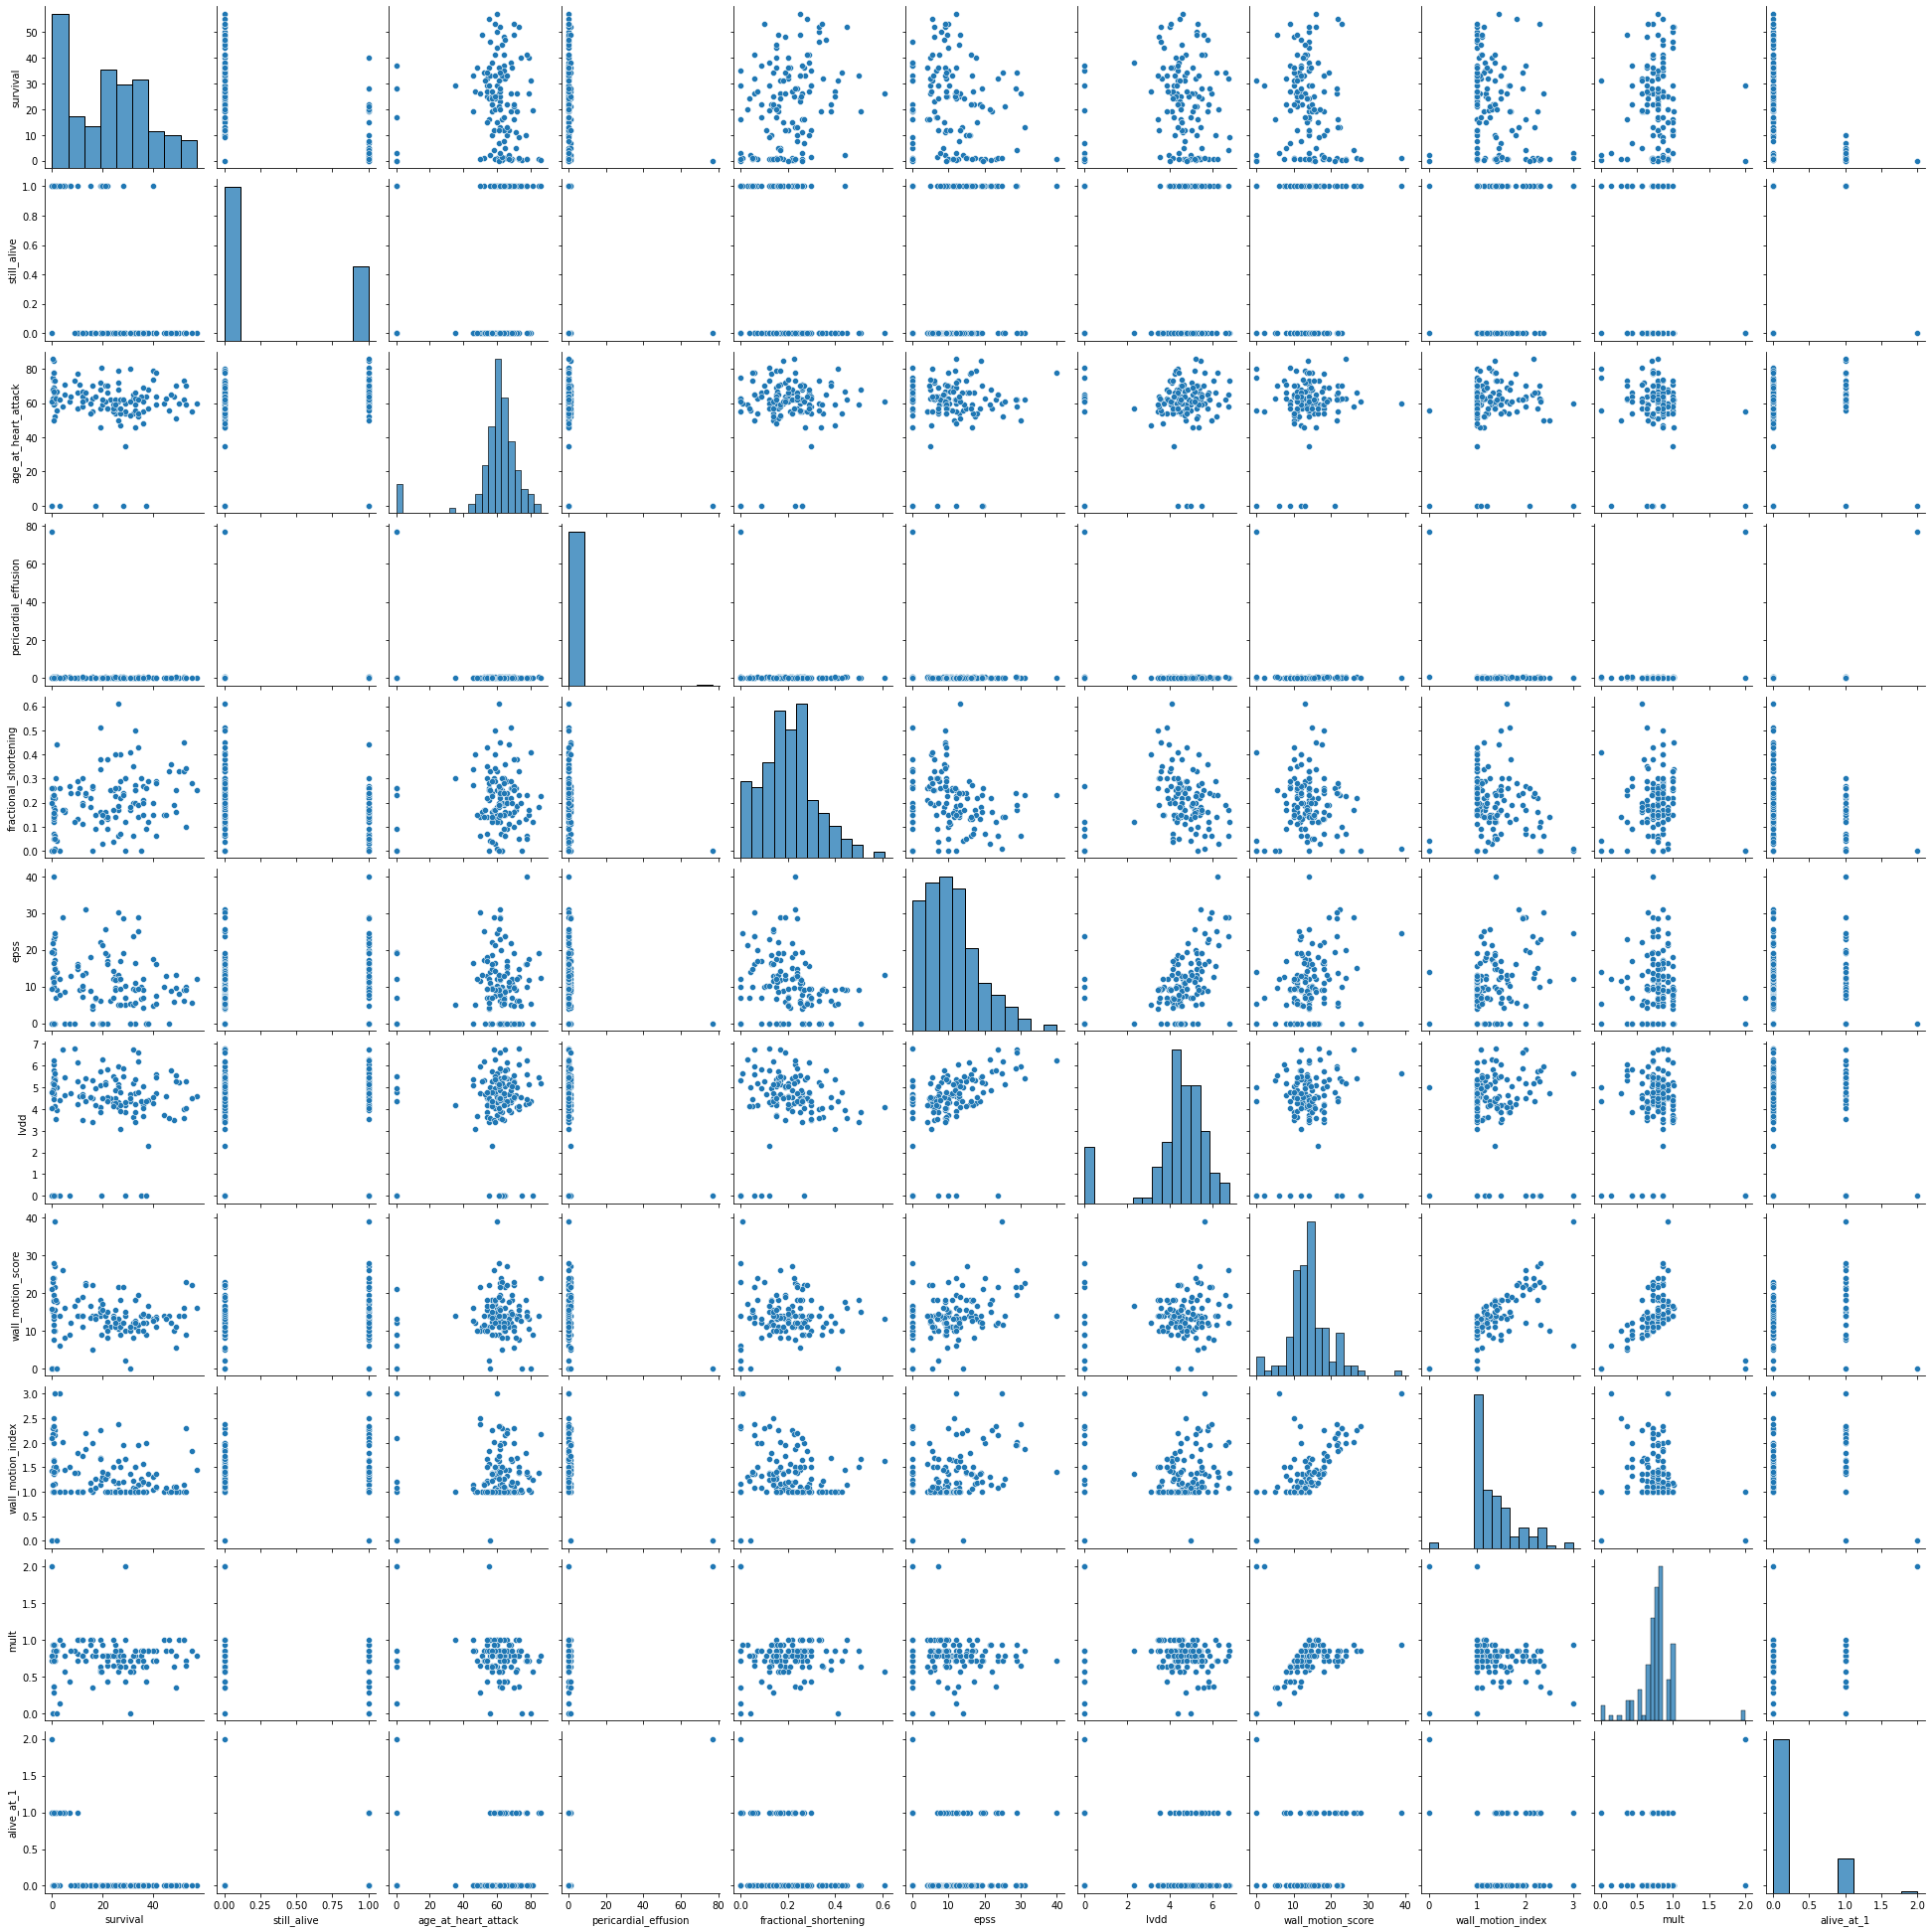

In [3]:
full_ecdg = echocardiogram.fillna(0) # full dataset
seaborn.pairplot(full_ecdg)

In [4]:
# Drop columns which won't provide information
del echocardiogram['name']
del echocardiogram['group']

In [5]:
# replace missing values with the median of the distribution.
for columnName in echocardiogram.keys():
    median = echocardiogram[columnName].median()
    echocardiogram[columnName] = echocardiogram[columnName].fillna(median)
# check
echocardiogram.isnull().any()

survival                 False
still_alive              False
age_at_heart_attack      False
pericardial_effusion     False
fractional_shortening    False
epss                     False
lvdd                     False
wall_motion_score        False
wall_motion_index        False
mult                     False
alive_at_1               False
dtype: bool

In [6]:
echocardiogram

,survival,still_alive,age_at_heart_attack,pericardial_effusion,fractional_shortening,epss,lvdd,wall_motion_score,wall_motion_index,mult,alive_at_1
0,11.0,0.0,71.0,0,0.260,9.000,4.600,14.0,1.000,1.000,0.0
1,19.0,0.0,72.0,0,0.380,6.000,4.100,14.0,1.700,0.588,0.0
2,16.0,0.0,55.0,0,0.260,4.000,3.420,14.0,1.000,1.000,0.0
3,57.0,0.0,60.0,0,0.253,12.062,4.603,16.0,1.450,0.788,0.0
4,19.0,1.0,57.0,0,0.160,22.000,5.750,18.0,2.250,0.571,0.0
...,...,...,...,...,...,...,...,...,...,...,...
127,7.5,1.0,64.0,0,0.240,12.900,4.720,12.0,1.000,0.857,0.0
128,41.0,0.0,64.0,0,0.280,5.400,5.470,11.0,1.100,0.714,0.0
129,36.0,0.0,69.0,0,0.200,7.000,5.050,14.5,1.210,0.857,0.0
130,22.0,0.0,57.0,0,0.140,16.100,4.360,15.0,1.360,0.786,0.0


In [7]:
# Normalize features by mean and stadard deviation
for columnName in echocardiogram.keys():
    mean = echocardiogram[columnName].mean()
    std = echocardiogram[columnName].std()
    echocardiogram[columnName] = (echocardiogram[columnName] - mean) / std
# seaborn.pairplot(echocardiogram)

In [8]:
encoder = preprocessing.LabelEncoder()

In [9]:
# survival
survival_col =  echocardiogram.loc[:,'survival']
survival_encoder = survival_col.values
survival_encoder = encoder.fit_transform(survival_encoder)
survival_encoder = np.array([survival_encoder]).T
# print(survival_encoder)

# still_alive
still_alive_col =  echocardiogram.loc[:,'still_alive']
still_alive_encoder = still_alive_col.values
still_alive_encoder = encoder.fit_transform(still_alive_encoder)
still_alive_encoder = np.array([still_alive_encoder]).T
# print(still_alive_encoder)

# age_at_heart_attack
age_at_heart_attack_col =  echocardiogram.loc[:,'age_at_heart_attack']
age_at_heart_attack_encoder = age_at_heart_attack_col.values
age_at_heart_attack_encoder = encoder.fit_transform(age_at_heart_attack_encoder)
age_at_heart_attack_encoder = np.array([age_at_heart_attack_encoder]).T
# print(age_at_heart_attack_encoder)

# pericardial_effusion
pericardial_effusion_col =  echocardiogram.loc[:,'pericardial_effusion']
pericardial_effusion_encoder = pericardial_effusion_col.values
pericardial_effusion_encoder = encoder.fit_transform(pericardial_effusion_encoder)
pericardial_effusion_encoder = np.array([pericardial_effusion_encoder]).T
# print(pericardial_effusion_encoder)

# fractional_shortening
fractional_shortening_col =  echocardiogram.loc[:,'fractional_shortening']
fractional_shortening_encoder = fractional_shortening_col.values
fractional_shortening_encoder = encoder.fit_transform(fractional_shortening_encoder)
fractional_shortening_encoder = np.array([fractional_shortening_encoder]).T
# print(fractional_shortening_encoder)

# epss
epss_col =  echocardiogram.loc[:,'epss']
epss_encoder = epss_col.values
epss_encoder = encoder.fit_transform(epss_encoder)
epss_encoder = np.array([epss_encoder]).T
# print(epss_encoder)

# lvdd
lvdd_col =  echocardiogram.loc[:,'lvdd']
lvdd_encoder = lvdd_col.values
lvdd_encoder = encoder.fit_transform(lvdd_encoder)
lvdd_encoder = np.array([lvdd_encoder]).T
# print(lvdd_encoder)

# wall_motion_score
wall_motion_score_col =  echocardiogram.loc[:,'wall_motion_score']
wall_motion_score_encoder = wall_motion_score_col.values
wall_motion_score_encoder = encoder.fit_transform(wall_motion_score_encoder)
wall_motion_score_encoder = np.array([wall_motion_score_encoder]).T
# print(wall_motion_score_encoder)

# wall_motion_index
wall_motion_index_col =  echocardiogram.loc[:,'wall_motion_index']
wall_motion_index_encoder = wall_motion_index_col.values
wall_motion_index_encoder = encoder.fit_transform(wall_motion_index_encoder)
wall_motion_index_encoder = np.array([wall_motion_index_encoder]).T
# print(wall_motion_index_encoder)

# mult
mult_col =  echocardiogram.loc[:,'mult']
mult_encoder = mult_col.values
mult_encoder = encoder.fit_transform(mult_encoder)
mult_encoder = np.array([mult_encoder]).T
# print(mult_encoder)

# alive_at_1
alive_at_1_col =  echocardiogram.loc[:,'alive_at_1']
alive_at_1_encoder = alive_at_1_col.values
alive_at_1_encoder = encoder.fit_transform(alive_at_1_encoder)
alive_at_1_encoder = np.array([alive_at_1_encoder]).T
print(alive_at_1_encoder)

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [2]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


In [10]:
X = np.concatenate((survival_encoder, still_alive_encoder, age_at_heart_attack_encoder, pericardial_effusion_encoder, fractional_shortening_encoder, epss_encoder, lvdd_encoder, wall_motion_score_encoder, wall_motion_index_encoder, mult_encoder),axis =1)
print(X.shape)
print(X)

(132, 10)
[[14  0 26 ... 20  0 24]
 [20  0 27 ... 20 42 10]
 [18  0  9 ... 20  0 24]
 ...
 [38  0 24 ... 21 15 21]
 [24  0 11 ... 22 24 18]
 [22  0 16 ... 23 31 18]]


In [11]:
from sklearn.model_selection import train_test_split
y = alive_at_1_encoder
X_train, X_test, y_train, y_test = train_test_split(\
    X, y, test_size=0.33, random_state=42)
# print(X_train)
print('Train:')
print(X_train.shape)
print(y_train.shape)
print('Test:')
print(X_test.shape)
print(y_test.shape)

Train:
(88, 10)
(88, 1)
Test:
(44, 10)
(44, 1)


In [12]:
from sklearn.neighbors import KNeighborsClassifier
model_kNN = KNeighborsClassifier()
params = {
    'n_neighbors': [i for i in range(1,21)],
    'weights': ['uniform', 'distance'],
    'leaf_size': [5, 10, 30]
}

grid_search = GridSearchCV(model_kNN, param_grid=params)
grid_search.fit(X_train, y_train)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.8862745098039216
Best parameters: {'leaf_size': 5, 'n_neighbors': 17, 'weights': 'distance'}


In [13]:
model_kNN = KNeighborsClassifier(**grid_search.best_params_)
model_kNN.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=5, n_neighbors=17, weights='distance')

In [14]:
y_pred = model_kNN.predict(X_test)
print('Prediction result using kNN model:', y_pred)

Prediction result using kNN model: [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0]


In [15]:
# in kết quả để so sánh
for i in range(len(y_test)):
    print(int(y_test[i]),"|",y_pred[i])

0 | 0
1 | 0
1 | 1
0 | 0
0 | 0
0 | 0
0 | 0
0 | 0
0 | 0
0 | 0
0 | 0
0 | 0
0 | 0
0 | 0
1 | 0
0 | 0
0 | 0
0 | 0
0 | 0
0 | 0
0 | 0
1 | 0
0 | 0
0 | 0
1 | 0
0 | 0
0 | 0
0 | 0
0 | 0
0 | 0
0 | 0
0 | 0
1 | 1
0 | 0
0 | 0
0 | 0
1 | 0
0 | 0
0 | 0
0 | 0
1 | 0
0 | 0
0 | 0
0 | 0


In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92        36
           1       1.00      0.25      0.40         8

    accuracy                           0.86        44
   macro avg       0.93      0.62      0.66        44
weighted avg       0.88      0.86      0.83        44



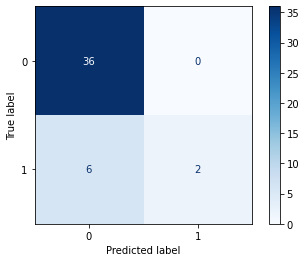

In [17]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model_kNN, X_test, y_test, cmap=plt.cm.Blues)

In [18]:
from sklearn.naive_bayes import BernoulliNB
model_bNB = BernoulliNB()
model_bNB.fit(X_train, y_train)

params = {
    'alpha': [0.0001, 1, 2, 10]
}

grid_search = GridSearchCV(model_bNB, param_grid=params)
grid_search.fit(X_train, y_train)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.8960784313725491
Best parameters: {'alpha': 0.0001}


In [19]:
model_bNB = BernoulliNB(**grid_search.best_params_)
model_bNB.fit(X_train, y_train)

BernoulliNB(alpha=0.0001)

In [20]:
y_pred = model_bNB.predict(X_test)
print('Prediction result using BernoulliNB model:', y_pred)

Prediction result using BernoulliNB model: [0 1 1 1 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 0 0 1 0 1 1]


In [21]:
# in kết quả để so sánh
for i in range(len(y_test)):
    print(int(y_test[i]),"|",y_pred[i])

0 | 0
1 | 1
1 | 1
0 | 1
0 | 1
0 | 0
0 | 0
0 | 0
0 | 0
0 | 0
0 | 1
0 | 0
0 | 1
0 | 1
1 | 1
0 | 0
0 | 0
0 | 0
0 | 0
0 | 0
0 | 1
1 | 1
0 | 0
0 | 0
1 | 1
0 | 0
0 | 0
0 | 0
0 | 1
0 | 0
0 | 0
0 | 0
1 | 1
0 | 0
0 | 0
0 | 0
1 | 1
0 | 0
0 | 0
0 | 0
1 | 1
0 | 0
0 | 1
0 | 1


In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86        36
           1       0.47      1.00      0.64         8

    accuracy                           0.80        44
   macro avg       0.74      0.88      0.75        44
weighted avg       0.90      0.80      0.82        44



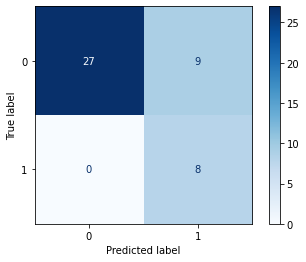

In [23]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model_bNB, X_test, y_test, cmap=plt.cm.Blues)

In [25]:
from sklearn import svm
model_svm = svm.SVC()

params = {
    'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100],
    'kernel': ['linear', 'poly', 'rbf'],
                 }
grid_search = GridSearchCV(model_svm, param_grid=params)
grid_search.fit(X_train, y_train)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.8869281045751635
Best parameters: {'C': 0.1, 'kernel': 'poly'}


In [26]:
model_svm = svm.SVC(**grid_search.best_params_)
model_svm.fit(X_train, y_train)

SVC(C=0.1, kernel='poly')

In [27]:
y_pred = model_svm.predict(X_test)
print('Prediction result using SVM model', y_pred)

Prediction result using SVM model [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0]


In [28]:
# in kết quả để so sánh
for i in range(len(y_test)):
    print(int(y_test[i]),"|",y_pred[i])

0 | 0
1 | 0
1 | 1
0 | 0
0 | 0
0 | 0
0 | 0
0 | 0
0 | 0
0 | 0
0 | 0
0 | 0
0 | 0
0 | 0
1 | 0
0 | 0
0 | 0
0 | 0
0 | 0
0 | 0
0 | 0
1 | 0
0 | 0
0 | 0
1 | 1
0 | 0
0 | 0
0 | 0
0 | 0
0 | 0
0 | 0
0 | 0
1 | 1
0 | 0
0 | 0
0 | 0
1 | 0
0 | 0
0 | 0
0 | 0
1 | 0
0 | 0
0 | 0
0 | 0


In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94        36
           1       1.00      0.38      0.55         8

    accuracy                           0.89        44
   macro avg       0.94      0.69      0.74        44
weighted avg       0.90      0.89      0.86        44



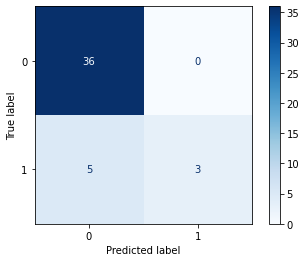

In [30]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model_svm, X_test, y_test, cmap=plt.cm.Blues)

In [31]:
from sklearn.ensemble import RandomForestClassifier

model_rfc = RandomForestClassifier()

params = {'n_estimators': [10, 50, 100, 1000],
                  'max_depth': [None, 3, 5, 15]
                 }

grid_search = GridSearchCV(model_rfc, param_grid=params)
grid_search.fit(X_train, y_train)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.9084967320261438
Best parameters: {'max_depth': 5, 'n_estimators': 10}


In [32]:
model_rfc = RandomForestClassifier(**grid_search.best_params_)
model_rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=10)

In [33]:
y_pred = model_rfc.predict(X_test)
print('Prediction result using Random Forest Classifier classifier model\n', y_pred)

Prediction result using Random Forest Classifier classifier model
 [0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 1 0 0 0]


In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95        36
           1       0.83      0.62      0.71         8

    accuracy                           0.91        44
   macro avg       0.88      0.80      0.83        44
weighted avg       0.91      0.91      0.90        44



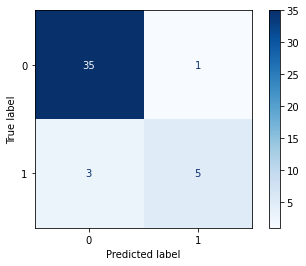

In [35]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model_rfc, X_test, y_test, cmap=plt.cm.Blues)